# 1. 降维

即用一组个数为 d 的向量$Z_i$来代表个数为 D 的向量 $X_i$ 所包含的有用信息，其中 $d<D$，通俗来讲，即将高维度下降至低维度；将高维数据下降为低维数据。

通常，我们会发现大部分数据集的维度都会高达成百乃至上千，而经典的例如 MNIST，其维度都是 64。
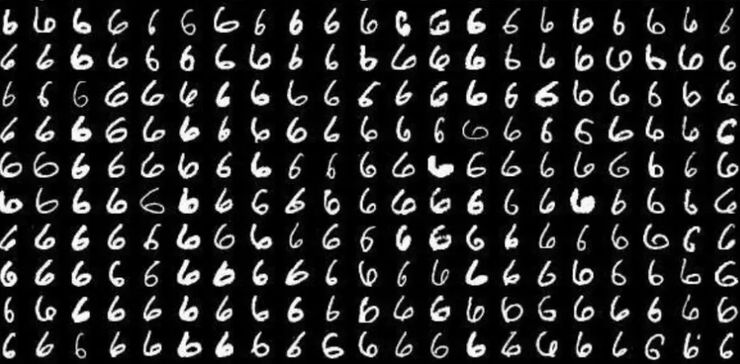

但在实际应用中，我们所用到的有用信息却并不需要那么高的维度，而且每增加一维所需的样本个数呈指数级增长，这可能会直接带来极大的「维数灾难」;而数据降维就可以实现：

- 使得数据集更易使用
- 确保变量之间彼此独立
- 降低算法计算运算成本

去除噪音一旦我们能够正确处理这些信息，正确有效地进行降维，这将大大有助于减少计算量，进而提高机器运作效率。而数据降维，也常应用于文本处理、人脸识别、图片识别、自然语言处理等领域。

## 数据降维原理

往往高维空间的数据会出现分布稀疏的情况，所以在降维处理的过程中，我们通常会做一些数据删减，这些数据包括了冗余的数据、无效信息、重复表达内容等。

例如：现有一张 $1024*1024$ 的图，除去中心 $50*50$ 的区域其它位置均为零值，这些为零的信息就可以归为无用信息;而对于对称图形而言，对称部分的信息则可以归为重复信息。

因此，大部分经典降维技术也是基于这一内容而展开，其中降维方法又分为线性和非线性降维，非线性降维又分为基于核函数和基于特征值的方法。

线性降维方法：PCA 、ICA LDA、LFA、LPP(LE 的线性表示)

非线性降维方法：

基于核函数的非线性降维方法——KPCA 、KICA、KDA

基于特征值的非线性降维方法(流型学习)——ISOMAP、LLE、LE、LPP、LTSA、MVU

# 2. 主成份分析

简称为PCA，是一种非监督学习算法，经常被用来进行数据降维、有损数据压缩、特征抽取、数据可视化（Jolliffe, 2002）。它也被称为Karhunen-Loève变换。

## PCA原理
PCA的思想是将$n$维特征映射到k维空间上$k<n$，这k维特征是全新的正交特征，是重新构造出来的k维特征，而不是简单地从n维特征中去除其余$n−k$维特征。那么如何衡量投影向量的优劣呢？在数学上有三种方法衡量投影的优劣！PCA可以被定义为数据在低维线性空间上的正交投影，这个线性空间被称为主子空间（principal subspace），使得投影数据的方差被最大化（Hotelling, 1933），即最大方差理论。等价地，它也可以被定义为使得平均投影代价最小的线性投影，即最小误差理论。平均投影代价是指数据点和它们的投影之间的平均平方距离（Pearson, 1901）。还有另一个理论也可以解释PCA原理，即坐标轴相关度理论。

### 1.1 最大方差理论
在信号处理中认为信号具有较大的方差，噪声有较小的方差，信噪比就是信号与噪声的方差比，越大越好。因此我们认为，最好的$k$维特征是将$n$维样本点变换为$k$维后，每一维上的样本方差都尽可能的大。

首先，考虑在一维空间$ (k=1) $上的投影。我们可以使用n维向量$u$定义这个空间的方向。为了方便(并且不失一般性)，我们假定选择一个单位向量，从而$u^Tu=1$ (注意，我们只对$u$的方向感兴趣，而对$u$本身的大小不感兴趣)。
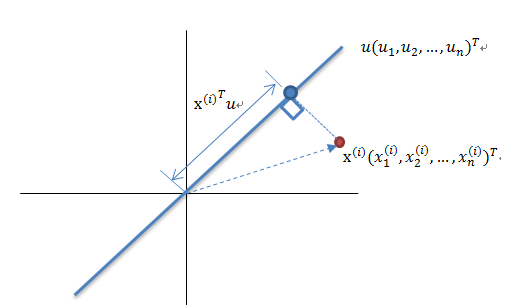
如上图所示，红色点表示原样本点$x^{(i)}$，$u$是蓝色直线的斜率也是直线的方向向量，而且是单位向量，直线上的蓝色点表示原样本点$x^{(i)}$在$u$上的投影。容易知道投影点离原点的距离是$x^{(i)T}u$，由于这些原始样本点的每一维特征均值都为0，因此投影到u上的样本点的均值仍然是0。

假设原始数据集为$X_{mxn}$，我们的目标是找到最佳的投影空间$W_{nxk}=(w_1,w_2,…,w_k)$，其中$w_i$是单位向量且$w_i$与$w_j (i≠j)$正交， 何为最佳的$W$？就是原始样本点投影到$W$上之后，使得投影后的样本点方差最大。

### 1.2 最小平方误差理论

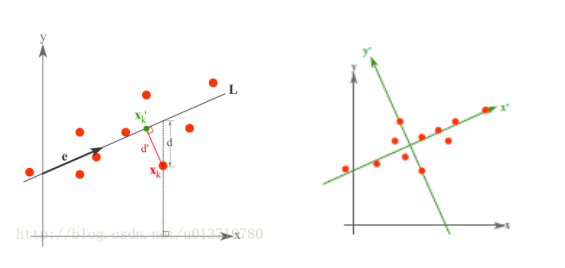
如上图所示，假设有这样的二维样本点（红色点），按照前文我们讲解的最大方差理论，我们的目标是是求一条直线，使得样本点投影到直线或者平面上的点的方差最大。本质是求直线或者平面，那么度量直线求的好不好，不仅仅只有方差最大化的方法。再回想我们最开始学习的线性回归等，目的也是求一个线性函数使得直线能够最佳拟合样本点，那么我们能不能认为最佳的直线就是回归后的直线呢？回归时我们的最小二乘法度量的是样本点到直线的坐标轴距离。比如这个问题中，特征是x，类标签是y。回归时最小二乘法度量的是距离d。如果使用回归方法来度量最佳直线，那么就是直接在原始样本上做回归了，跟特征选择就没什么关系了。
因此，我们打算选用另外一种评价直线好坏的方法，使用点到直线的距离$d′$来度量。

现在有m个样本点$x^{(1)}$,$x^{(2)}$,...,$x^{(m)}$，每个样本点为n维。将样本点$x^{(i)}$在直线上的投影记为${x^{(i)}}^′$，那么我们就是要最小化.


# 3. 主成分分析(PCA)降维算法

PCA 是一种基于从高维空间映射到低维空间的映射方法，也是最基础的无监督降维算法，其目标是向数据变化最大的方向投影，或者说向重构误差最小化的方向投影。它由 Karl Pearson 在 1901 年提出，属于线性降维方法。与 PCA 相关的原理通常被称为最大方差理论或最小误差理论。这两者目标一致，但过程侧重点则不同。
## 3.1 PCA算法流程
将一组 N 维向量降为 K 维(K 大于 0，小于 N)，其目标是选择 K 个单位正交基，各字段两两间$ Cov(X,Y)$为 0，而字段的方差则尽可能大。因此，最大方差即使得投影数据的方差被最大化，在这过程中，我们需要找到数据集 $X_{mxn}$ 的最佳的投影空间$W_{nxk}$、协方差矩阵等，其算法流程为：

- 算法输入：数据集 $X_{mxn}$;

- 按列计算数据集 X 的均值$X_{mean}$，然后令 $X_{new}=X−X_{mean}$;

- 求解矩阵 $X_{new}$的协方差矩阵，并将其记为$Cov$;

- 计算协方差矩阵$Cov$的特征值和相应的特征向量;

- 将特征值按照从大到小的排序，选择其中最大的$ k $个，然后将其对应的$ k $个特征向量分别作为列向量组成特征向量矩阵$W_{nxk}$;

- 计算$X_{new}W$，即将数据集 $X_{new}$ 投影到选取的特征向量上，这样就得到了我们需要的已经降维的数据集$X_{new}W$。

## 3.2 PCA算法优缺点

### 优点：

- 它是无监督学习，完全无参数限制的。在PCA的计算过程中完全不需要人为的设定参数或是根据任何经验模型对计算进行干预，最后的结果只与数据相关，与用户是独立的。

- 用PCA技术可以对数据进行降维，同时对新求出的“主元”向量的重要性进行排序，根据需要取前面最重要的部分，将后面的维数省去，可以达到降维从而简化模型或是对数据进行压缩的效果。同时最大程度的保持了原有数据的信息。

- 各主成分之间正交，可消除原始数据成分间的相互影响。

- 计算方法简单，易于在计算机上实现。

### 缺点：

- 如果用户对观测对象有一定的先验知识，掌握了数据的一些特征，却无法通过参数化等方法对处理过程进行干预，可能会得不到预期的效果，效率也不高。

- 贡献率小的主成分往往可能含有对样本差异的重要信息。

- 特征值矩阵的正交向量空间是否唯一有待讨论。

- 在非高斯分布的情况下，PCA方法得出的主元可能并不是最优的，此时在寻找主元时不能将方差作为衡量重要性的标准。

## 3.3 sklearn.decompositon中PCA 方法特点

## 函数原型：
sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver=‘auto’, tol=0.0, iterated_power=‘auto’, random_state=None)

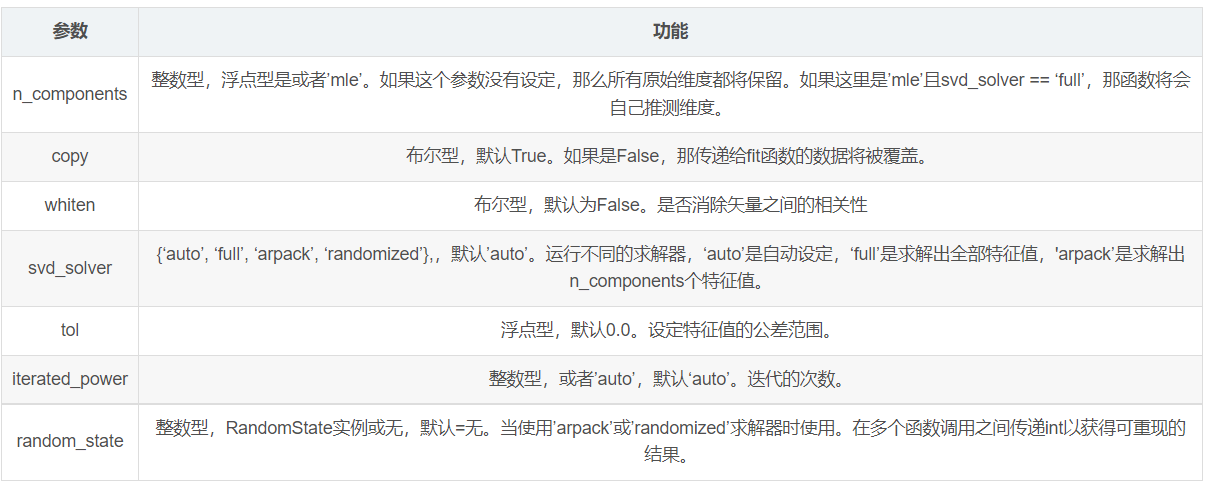

#### 方法：
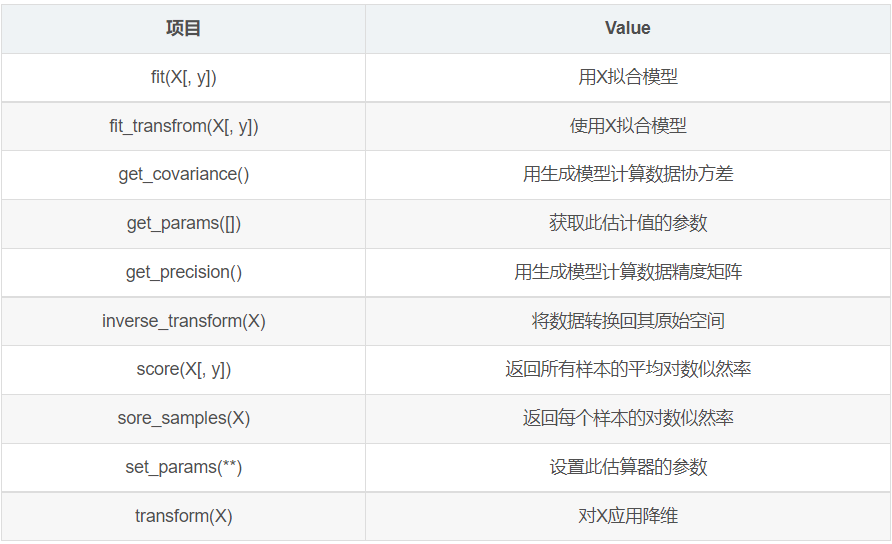

# 4. PCA程序示例

## 4.1 鸢尾花数据降维
鸢尾花数据集涵盖了3种鸢尾花（Setosa，Versicolour和Virginica），具有4个属性：萼片长度，萼片宽度，花瓣长度和花瓣宽度。

应用于此数据的主成分分析（PCA）可以识别出导致数据差异最大的属性组合。

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets#官方提供的开源数据集，里面有很多可免费使用的数据库

iris = datasets.load_iris()#加载iris数据集，第一次使用会从服务器下载，之后就是本地调用
#iris数据集是一个复合型的数据
iris.data[:10,:]#查看iris数据的前10行

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

数据的方差： [4.22824171 0.24267075]
各特征的权重为: ratio =  [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

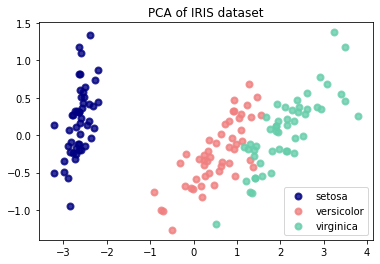

In [17]:
from sklearn.decomposition import PCA#导入PCA函数

X = iris.data#iris.data是一个150*4的数据,描述鸢尾花的属性
y = iris.target#iris.target是每一个鸢尾花的种类
target_names = iris.target_names#鸢尾花的种类，一共三种

pca = PCA(n_components=2)#创建PCA实例，选取2个主成分
X_2r = pca.fit(X).transform(X)#对数据进行拟合，然后降维 X_2r=pca.fit_transform(X)与之效果一样

ratio = pca.explained_variance_ratio_
print("数据的方差：",pca.explained_variance_)
print("各特征的权重为: ratio = ",ratio)

#为直观展示数据，进行如下可视化
plt.figure()#创建画布
colors = ['navy', 'lightcoral', 'mediumaquamarine']#定义每个种类的颜色,自己喜欢就好
#分别定义三个种类的花花的散点图形式
for color, i, target_name in zip(colors, [0,1, 2], target_names):
    plt.scatter(X_2r[y == i, 0], X_2r[y == i, 1], color=color, alpha=.8,lw=2,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)#展示图例
plt.title('PCA of IRIS dataset')

### PCA降维常用的两种方法：
#### 方法1：指定维度

In [27]:
from sklearn.decomposition import PCA
## 使用本地csv数据可取消以下3行注释
#iris=pd.read_csv(r'./data/iris.csv')#本地数据
#col=iris.columns.values
#dat=np.array(iris.values)[:10,1:]

# 降为2维
pca1 = PCA(n_components=2, svd_solver='arpack')

res = pca1.fit(iris.data)#使用PCA对iris数据进行降维
ratio = pca1.explained_variance_ratio_
print("数据的方差：",pca1.explained_variance_)
print("各特征的权重为: ratio = ",ratio)

数据的方差： [4.22824171 0.24267075]
各特征的权重为: ratio =  [0.92461872 0.05306648]


#### 方法2：指定降维后的主成分方差：

In [31]:
pca1 = PCA(n_components=0.85)# 可以改为0.95对比以下效果

res = pca1.fit(iris.data)#使用PCA对iris数据进行降维
ratio = pca1.explained_variance_ratio_
print("数据的方差：",pca1.explained_variance_)
print("各特征的权重为: ratio = ",ratio)

数据的方差： [4.22824171]
各特征的权重为: ratio =  [0.92461872]


## 4.2 随机产生高维进行降维

C:\Users\LJH\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


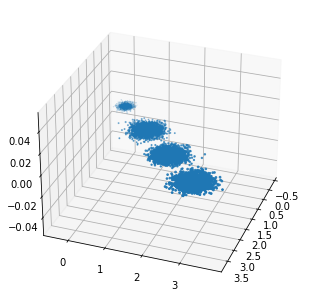

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets._samples_generator import make_blobs

# 生成随机数据并可视化
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2],
                  random_state =9)
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

In [40]:
#先不降维，只对数据进行投影，看看投影后的三个维度的方差分布：

from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca.fit(X)
print('方差：',pca.explained_variance_)
print('权重：',pca.explained_variance_ratio_)

方差： [3.78521638 0.03272613 0.03202212]
权重： [0.98318212 0.00850037 0.00831751]


可以看出投影后三个特征维度的方差比例，投影后第一个特征占了绝大多数的主成分比例。
现在我们来进行降维，从三维降到2维:

In [37]:
pca=PCA(n_components=2)
pca.fit(X)
print('方差：',pca.explained_variance_)
print('权重：',pca.explained_variance_ratio_)

[3.78521638 0.03272613]
[0.98318212 0.00850037]


这个结果其实可以预料，因为上面三个投影后的特征维度的方差差别明显，投影到二维后选择的肯定是前两个特征，而抛弃第三个特征。
为了有个直观的认识，我们看看此时转化后的数据分布:

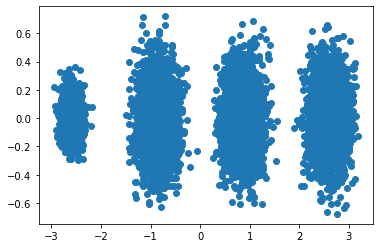

In [38]:
X_new=pca.transform(X)
plt.scatter(X_new[:,0],X_new[:,1],marker='o')
plt.show()

#### 制定主成分方差

In [42]:
#指定主成分的方差

pca = PCA(n_components=0.95)
pca.fit(X)
print('方差：',pca.explained_variance_)
print('权重：',pca.explained_variance_ratio_)

方差： [3.78521638]
权重： [0.98318212]
